In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

**Shapes of the data**

*   images=50000
*   pixels=32*32
*   channel=3(RGB)






In [3]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


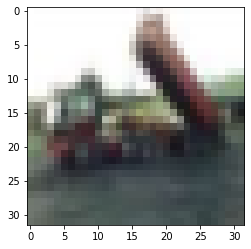

In [4]:
plt.imshow(x_train[2])

Normalize the data 

In [5]:
x_train=x_train/255
x_test=x_test/255

**Model Building**

In [6]:
cnn=models.Sequential([
                      #cnn-1
                      layers.Conv2D(filters=43, kernel_size=(3,3), activation='relu', kernel_initializer="he_uniform",input_shape=(32,32,3)),
                      layers.MaxPooling2D((2,2)),
                      #cnn-2
                      layers.Conv2D(filters=69,kernel_size=(3,3),activation='relu',kernel_initializer="he_uniform"),
                      layers.MaxPooling2D((2,2)),
                      #dense layer
                      layers.Flatten(),
                      layers.Dense(units=70,activation="relu",kernel_initializer="he_uniform"),
                      layers.Dense(units=54,activation="relu",kernel_initializer="he_uniform"),
                      layers.Dense(units=10,activation="softmax")])

In [7]:
cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [8]:
cnn.fit(x_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 7s 3ms/step - loss: 1.4087 - accuracy: 0.4937
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0430 - accuracy: 0.6354
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9094 - accuracy: 0.6835
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8254 - accuracy: 0.7133
Epoch 5/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7606 - accuracy: 0.7341
Epoch 6/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6996 - accuracy: 0.7570
Epoch 7/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6505 - accuracy: 0.7735
Epoch 8/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6017 - accuracy: 0.7891
Epoch 9/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5581 - accuracy: 0.8040
Epoch 10/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.522

In [9]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.1902 - accuracy: 0.6908


[1.1902437210083008, 0.6908000111579895]

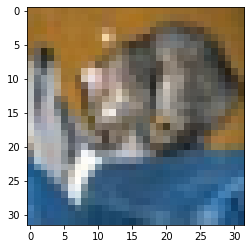

In [15]:
plt.imshow(x_test[0])

In [11]:
y_pred=cnn.predict(x_test)

In [14]:
np.argmax(y_pred[1])

8

In [13]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)